## (B) **Data Collection**

In [2]:
import pandas as pd
url = '/Sonar data.csv'
df = pd.read_csv(url , header = None)

There is a war going on, and there are some mines in our nation's sea...so we need defuse those Mines.For that we first need to detect the mines, but there can be rocks in the sea aswell.

***This project is all about whether our SONAR detected Mines or Rocks***

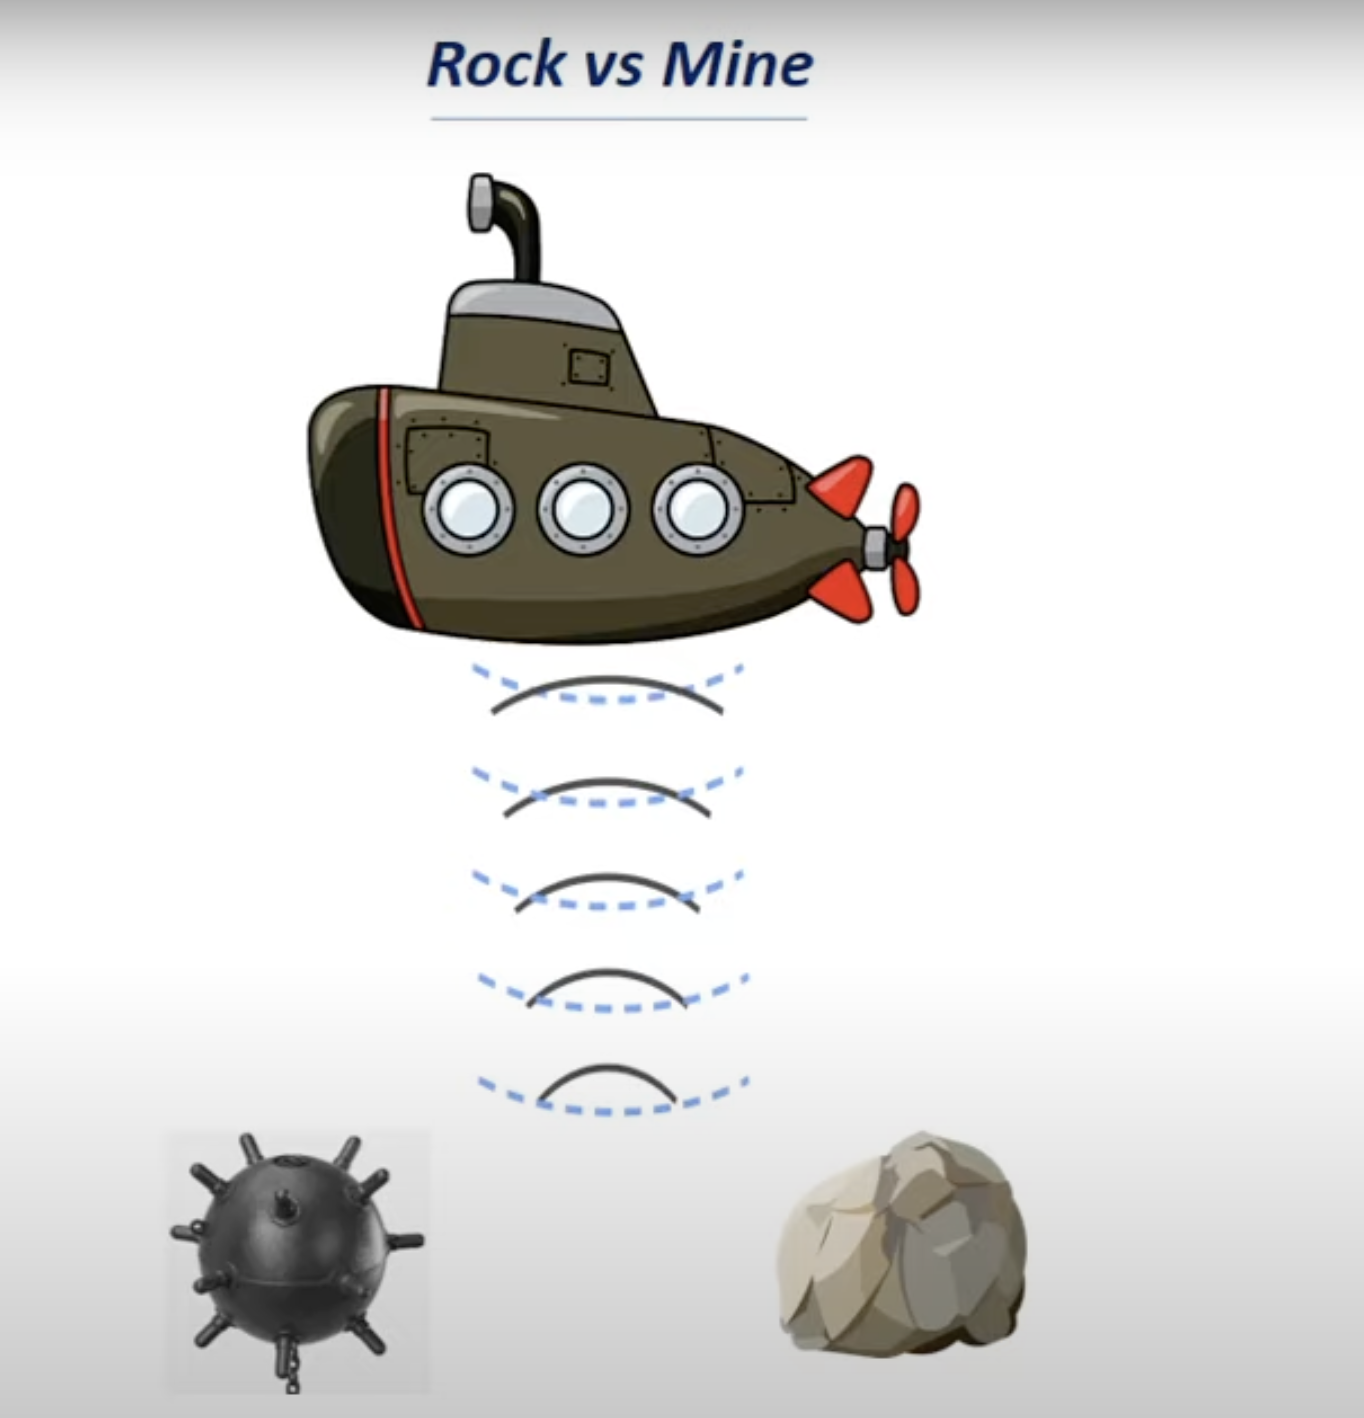

In our Dataset we have info about signal recieved by SONAR, after it gets deflected from either rock or a metallic object(Mines).

Here we will be using Logistic Regression (it is a supervised model) as it works well with binary data,


*   If close to 0 -> Rock
*   If close to 1 -> Mine



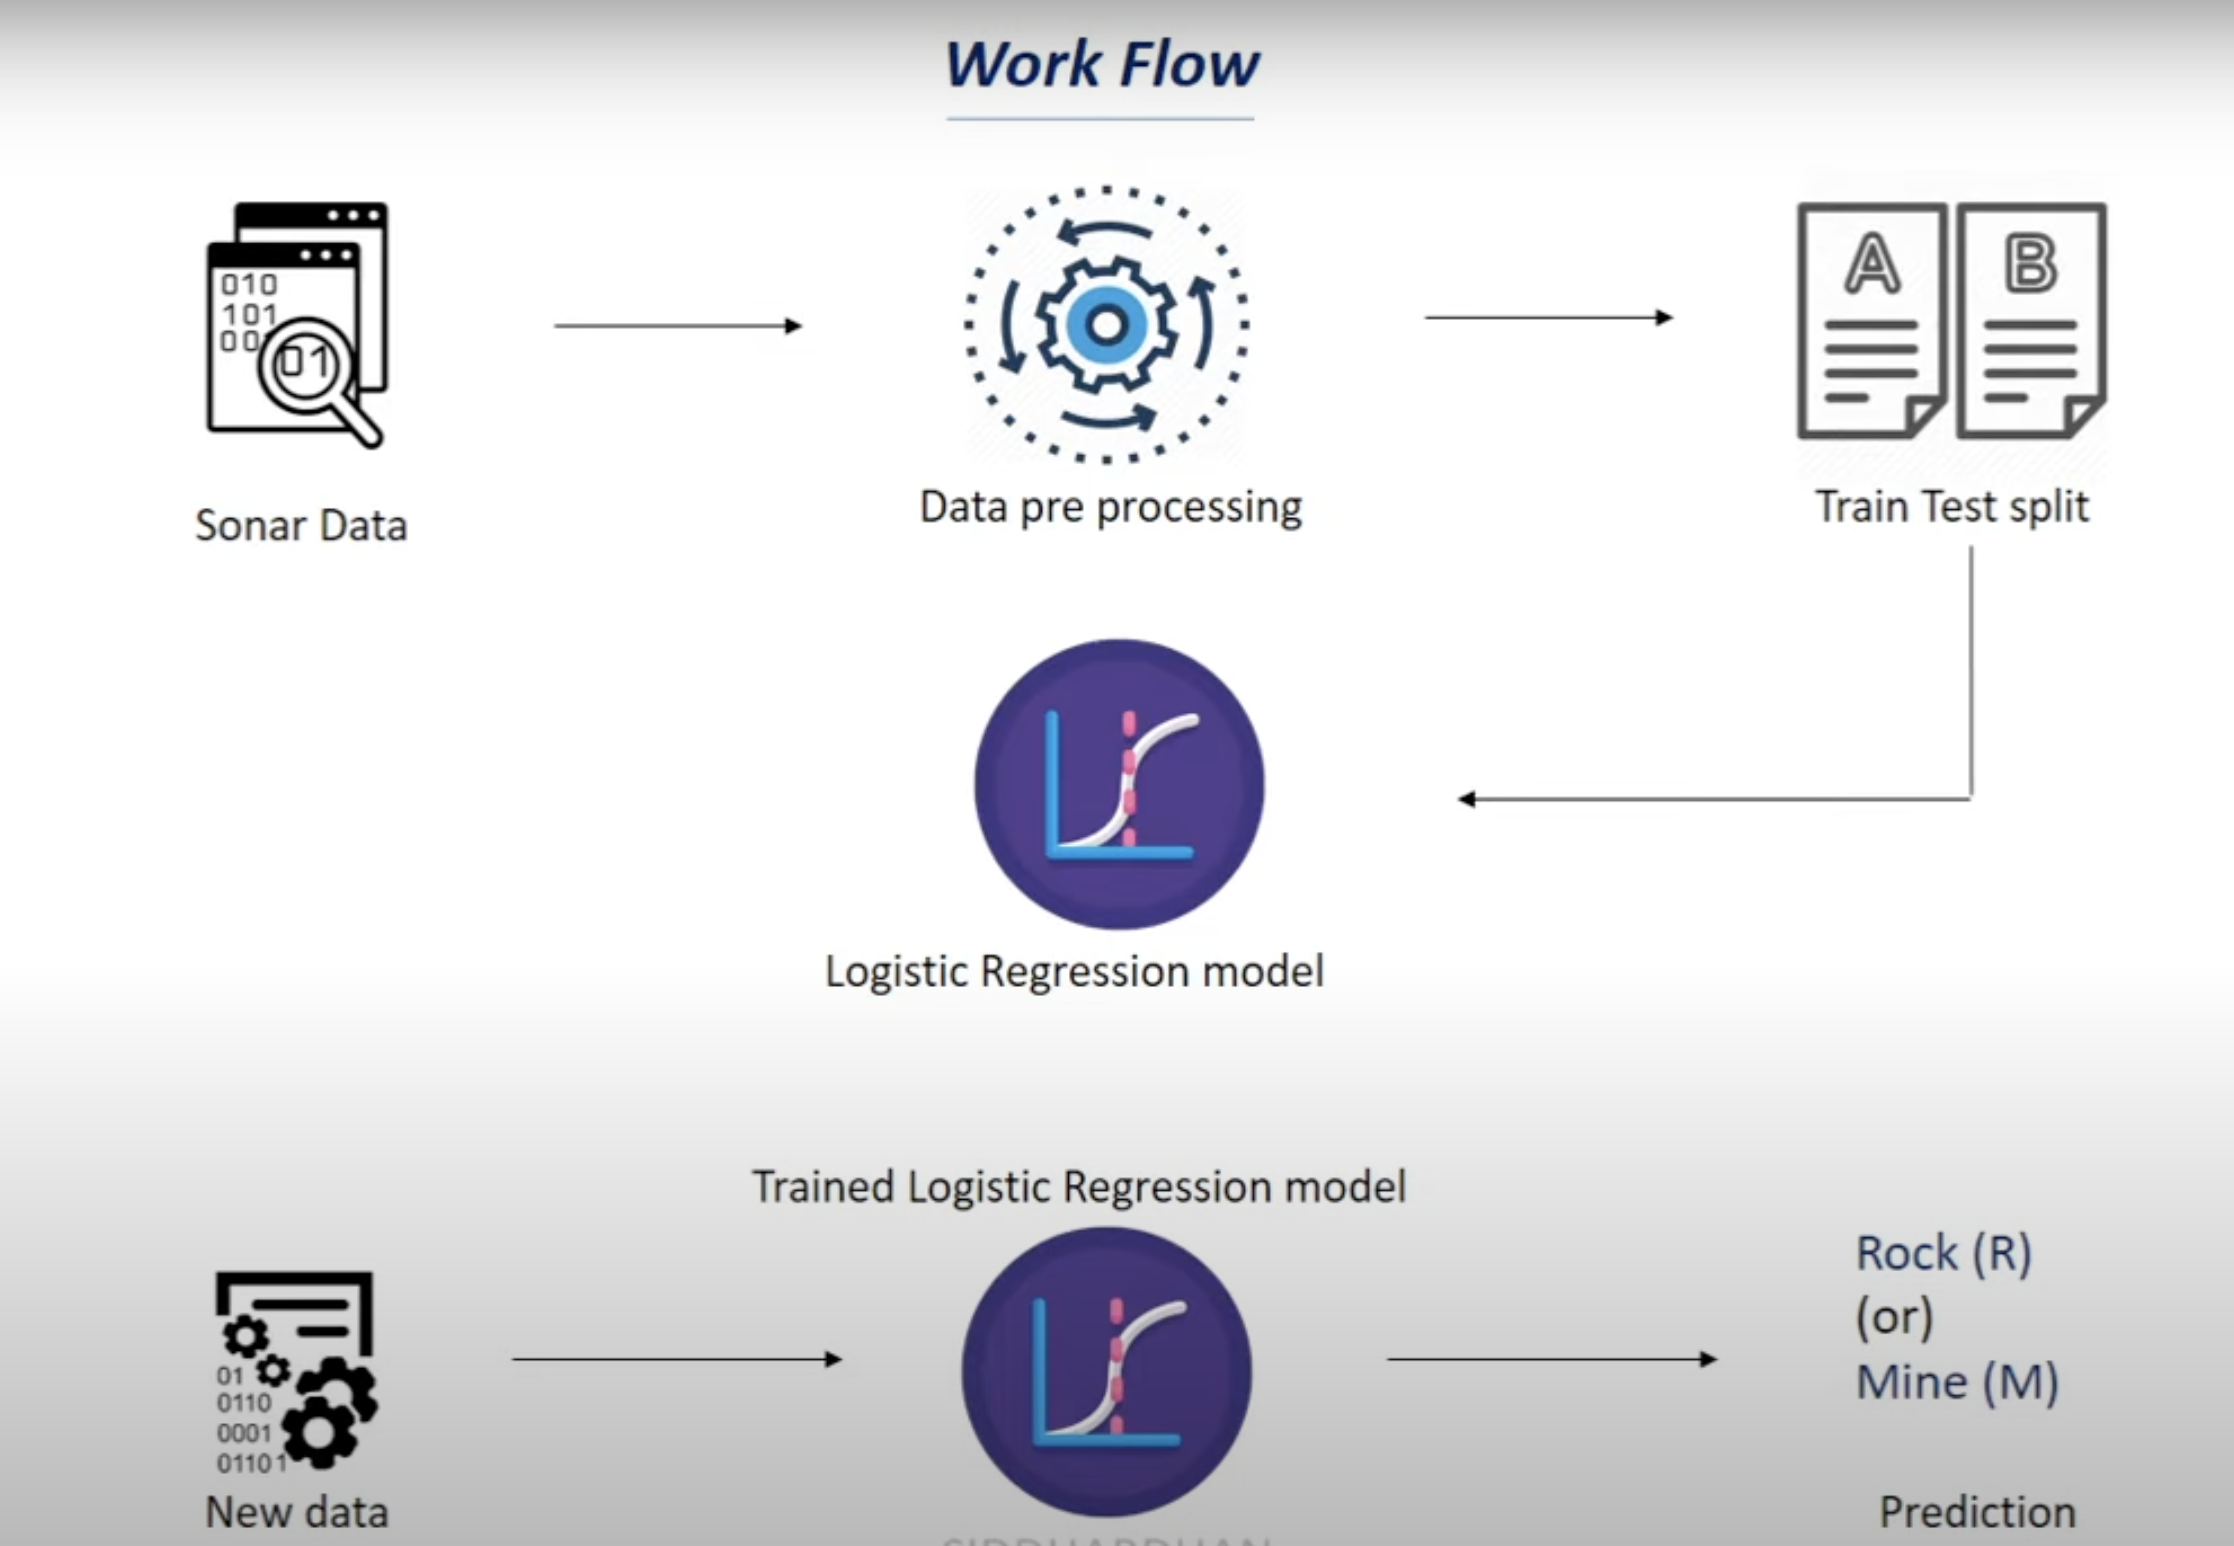

The main difference between ***logistic regression*** and ***linear regression*** lies in their purpose and the type of data they are designed to analyze.

**Purpose:**

1)Linear regression is used when the dependent variable (the variable we are trying to predict) is continuous. It predicts the value of a dependent variable based on the values of one or more independent variables.

2)Logistic regression, on the other hand, is used when the dependent variable is categorical. It predicts the probability of occurrence of an event by fitting data to a logistic curve.

**Output:**

1)Linear regression produces continuous values as output. For example, predicting house prices, stock prices, etc.

2)Logistic regression produces probabilities as output, typically between 0 and 1, which can be interpreted as the likelihood of an observation belonging to a particular category. It's commonly used for binary classification problems, such as predicting whether an email is spam or not spam.

**Model Representation:**

1)In linear regression, the relationship between the independent variables and the dependent variable is represented by a straight line.

2)In logistic regression, the relationship between the independent variables and the dependent variable is represented by the natural logarithm of the odds ratio.

## (A) **Importing the Dependencies**

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #To find the accuracy of our model.

## (C) **Data Processing**

In [16]:
df.describe(include = 'all')
#By using this we can observe that we have -
# 2 Unique values M and R
# Where no. of mines are repeating too many times
#And 111 times Mines are repeating

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,NaN
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,NaN
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,NaN
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,NaN
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,NaN
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,NaN


In [15]:
df.notnull().sum() #To see if there are any not null values.

0     208
1     208
2     208
3     208
4     208
     ... 
56    208
57    208
58    208
59    208
60    208
Length: 61, dtype: int64

In [18]:
print(df.isnull().sum()) #To see if there are any null values.

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


In [17]:
df.shape #Here are 208 rows, and there are 208 nut null values, that means there arent any null values in the dataset.
#There are 61 columns.

(208, 61)

In [21]:
df[60].info() #No Null values #Datatypes -> Object

<class 'pandas.core.series.Series'>
RangeIndex: 208 entries, 0 to 207
Series name: 60
Non-Null Count  Dtype 
--------------  ----- 
208 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [23]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M -> Mines

R -> Rocks

In [26]:
df.groupby(60).mean() #Mean of both M and R values in each column.

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## (D) **Supervised Learning**

Now we need to divide the data into X and Y....where X is the independent variable and Y is the dependent variable.

Here X is all the columns except the the 60 one.

And Y is the 60 column.Consist of R and M values.

Then we will train the data using X and Y....then predict the value of Yhat using X.

Then compare the values of Y and Yhat.

And the difference between their values will determine how good our model is.


In [29]:
X = df.drop(columns = 60 , axis = 1) #X is all the columns except 60, so dropping 60 column but not permanently.
Y = df[60]

In [30]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [31]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


## (E) **Train and Test data**

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split( X, Y , test_size = 0.1 ,stratify = Y , random_state = 1) #Setting the test sample to 10%

## (F) **Model Training** -> LogisticRegression

In [34]:
lr = LogisticRegression()
lr.fit(X_train , Y_train)

LogisticRegression()

## (G) **Model Evaluation** -> To check how accurate our model is

**1) Accuracy of Training Data....**

In [36]:
Yhat_train = lr.predict(X_train) #Predicting the Y_train value using X_train
training_data_accuracy = accuracy_score(Yhat_train , Y_train) #Calculating how accurate the predicted Y_train value is to the actual Y_train value.
print(training_data_accuracy)

0.8342245989304813


That means 83% values of Yhat(Predicted Y_train value ) matches the actual Y_train values.Which is good.

**2) Accuracy of Testing Data....**

In [37]:
Yhat_test = lr.predict(X_test) #Predicting the values of Y using X.
testing_data_accuracy = accuracy_score(Yhat_test , Y_test)
print(testing_data_accuracy)

0.7619047619047619


That means 76% values of Yhat(Predicted Y_test value ) matches the actual Y_test values.Which is good.

## (H) **Making a Predictive System** -> We will now give the input to our model and It will predict whether it is a rock or a mine.

In [39]:
#I took this input from the first line of our SONAR CSV file, which says that its a rock, so lets see if it predicts it to be a rock
input_data = (0.02,	0.0371,	0.0428,	0.0207,	0.0954	,0.0986	,0.1539	,0.1601,	0.3109,	0.2111,	0.1609	,0.1582	,0.2238	,0.0645,	0.066,	0.2273,	0.31,	0.2999,	0.5078,	0.4797,	0.5783,	0.5071,	0.4328,	0.555,	0.6711,	0.6415,	0.7104,	0.808,	0.6791,	0.3857,	0.1307,	0.2604,	0.5121,0.7547,	0.8537,	0.8507,	0.6692,	0.6097,	0.4943,	0.2744,	0.051,	0.2834,	0.2825,	0.4256,	0.2641,	0.1386,	0.1051,	0.1343,	0.0383,	0.0324,	0.0232,	0.0027,	0.0065,	0.0159,	0.0072,	0.0167,	0.018,	0.0084,	0.009,	0.0032)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

print(input_data_as_numpy_array)

[0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
 0.1609 0.1582 0.2238 0.0645 0.066  0.2273 0.31   0.2999 0.5078 0.4797
 0.5783 0.5071 0.4328 0.555  0.6711 0.6415 0.7104 0.808  0.6791 0.3857
 0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
 0.051  0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
 0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018  0.0084 0.009  0.0032]


In [44]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #Reshaping the array into 2D array

In [45]:
print(input_data_reshaped)

[[0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
  0.1609 0.1582 0.2238 0.0645 0.066  0.2273 0.31   0.2999 0.5078 0.4797
  0.5783 0.5071 0.4328 0.555  0.6711 0.6415 0.7104 0.808  0.6791 0.3857
  0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
  0.051  0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
  0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018  0.0084 0.009  0.0032]]


In [46]:
Yhat = lr.predict(input_data_reshaped) #Where X = input_data_reshaped. #Predicting the value Yhat based on the X input.

In [47]:
print(Yhat) #We got R(Rock) as expected, so our model is working great!

['R']


In [48]:
if (Yhat[0] == 'R'):
  print('The object is Rock')
else:
  print('The object is Mine') #To make the output more customised.

The object is Rock
